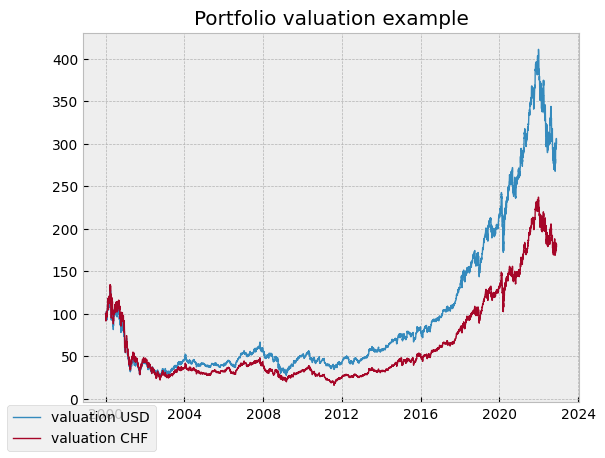

In [1]:
# Demonstrates the multi currency capabilities of the platform

from Portfolios import Portfolio, PortfolioValuator
from TimeSeries import TimeSeries
import numpy as npplt
import pandas as pd
import matplotlib.pyplot as plt 

# Let's create a simple portfolio with 2 US stocks, priced in USD
p:Portfolio = Portfolio()
p.buy('MSFT', 10)
p.buy('CSCO', 20)
# Let's value the portfolio in USD and get the index time series from it
v:PortfolioValuator = p.valuator()
index_usd:TimeSeries = v.get_valuations().rebase()
# Let's now value the portfolio in CHF to see the effect of the currency
index_chf:TimeSeries = v.get_valuations(ccy='CHF').rebase()

# Now let's graph the 2 time series to see the currency effect
# We are getting access to the underlying Numpy array in order to graph it
adjclose_vector_usd = index_usd.get_full_time_series()
adjclose_vector_chf = index_chf.get_full_time_series()
# We are getting access to the dates in order to display them on the horizontal axis
dates = pd.date_range(index_usd.get_start_date(), index_usd.get_end_date(), freq='D')
# And we graph the data with style
plt.style.use('bmh')
fig, ax = plt.subplots()
ax.set_title("Portfolio valuation example")
line_usd, = ax.plot(dates, adjclose_vector_usd, linewidth=1)
line_chf, = ax.plot(dates, adjclose_vector_chf, linewidth=1)
fig.legend((line_usd,line_chf), ('valuation USD','valuation CHF'), loc='lower left')
plt.show()
